### K-Means Clustering Template

In this template I aim to find the natural groupings of the customers of a mall based on their annual income and spending score.

We are using K-means clustering method because we don't have any idea about the segments of customers. 

Finding the natural grouping pof customers based on their annual income and spending score with choosing mean as a cluster center and find mutually exclusive clusters of spherical shape based on distance.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv') 

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = dataset.iloc[:, [3,4]].values

#### Ebow method to determine the number of cluster

To start our loop to calculate the withing cluster sum of squares for 10  different number of clusters.

In [5]:
from sklearn.cluster import KMeans

<function matplotlib.pyplot.show(*args, **kw)>

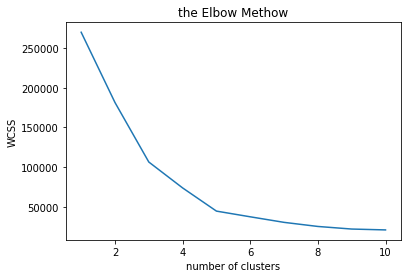

In [12]:
wcss=[] 
for i in range(1,11): #we choose 11 since the 11 band is excluded.
    kmeans= KMeans(n_clusters=i,init='k-means++', max_iter=300,n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('the Elbow Methow')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show    

About **Kmeans**

**n_clusters** for the number of clusters

**init** for initialization method, to prevent initialization trap it's better to use Kmeans++ initiallization method.

**max_iter** is the maximum # iterations there will be to find the final clusters. when the k-means algorithm is running. the defualt value for this parameter is 300 and that's what we are going to choose. 

**n_init** is the # of times the k-means algorithm will run with different initial centroids. the default is 10 and we will leave it to 10.

**kmeans.inertia_** is  the code to calculate the wcss of the kmeans

**Note:** to be able to append you need to define wcss as a list by [] not as a tupple ( by ()) 

We can see from the elbow method the optimum number of clusters which is **5**

### applying the K-Means to the dataset 


In [13]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(X)

**NOTE** : We are not using the fit method but we use the **fit_predict** method that for each observation returns the cluster it belongs to. 

that means for every single client of our dataset the fit_predict method is going to give us the cluster to which client belongs and it will retun its cluster number into a single vector that we are going to call **ykmeans** 


### Visualizing the clusters

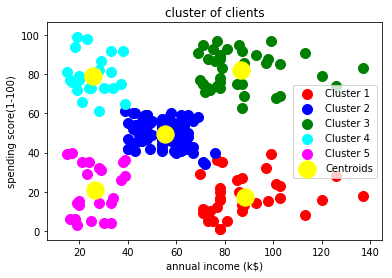

In [18]:
plt.scatter(X[y_kmeans==0, 0],X[y_kmeans==0, 1], s=100, c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1, 0],X[y_kmeans==1, 1], s=100, c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2, 0],X[y_kmeans==2, 1], s=100, c='green',label='Cluster 3')
plt.scatter(X[y_kmeans==3, 0],X[y_kmeans==3, 1], s=100, c='cyan',label='Cluster 4')
plt.scatter(X[y_kmeans==4, 0],X[y_kmeans==4, 1], s=100, c='magenta',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c='yellow',label='Centroids') #plot the centroids 
plt.title('cluster of clients')
plt.xlabel('annual income (k$)')
plt.ylabel('spending score(1-100)')
plt.legend()
plt.show()

now we need to plot the result. We are gonna plot a scatter plot with centroids and clusters showed on it. 

we start with plotting all the observations belongigng to cluster one y_kmeans==0 

and we specify that we want the first columns of our data X by 0 ( becuase index at python starts at 0 ). And by that we gave the all observations of the x that belongs to cluster one. and we have to do the same for y coordinates. 
second columns of our data X is gonna be the Y coordinate. 

s is for size of the data points

c is color of the cluster

#### plot interpretation

We can see that cluster 1 are careful. Don't spend that much even they earn alot.

cluster 2 are standard (around the mean) average income average & spending score

cluster 3 are target high income and high spending score

cluster 4 (low income and spend much) careless

cluster 5 sensible clients as opposed to careless clients
